An example of analyzing tidal currents.



In [1]:
import datetime
import matplotlib.pylab as plt

from salishsea_tools import (viz_tools,tidetools, nc_tools, ellipse)
from salishsea_tools.nowcast import (research_VENUS, analyze)

import seaborn as sns

%matplotlib inline


In [2]:
sns.set_style('darkgrid')

In [3]:
path='/data/dlatorne/MEOPAR/SalishSea/nowcast/'
SITES = research_VENUS.SITES['VENUS']

#Question 1

Is a 15 day time series enough to resolve M2 and K1?

Plan: Compare 15 day with 30 day.

### 15 days in January

In [4]:
to=datetime.datetime(2015,1,1)
tf=datetime.datetime(2015,1,15)

params_15 = {}; depths= {}

for site in SITES:
    params_15[site], depths[site] = ellipse.get_params_nowcast(to, tf, [SITES[site]['i']], [SITES[site]['j']], path, 2)


### 30 days in January

In [5]:
to=datetime.datetime(2015,1,1)
tf=datetime.datetime(2015,1,30)

params_30 = {}; depths= {}

for site in SITES:
    params_30[site], depths[site] = ellipse.get_params_nowcast(to, tf, [SITES[site]['i']], [SITES[site]['j']], path, 2)


### Compare

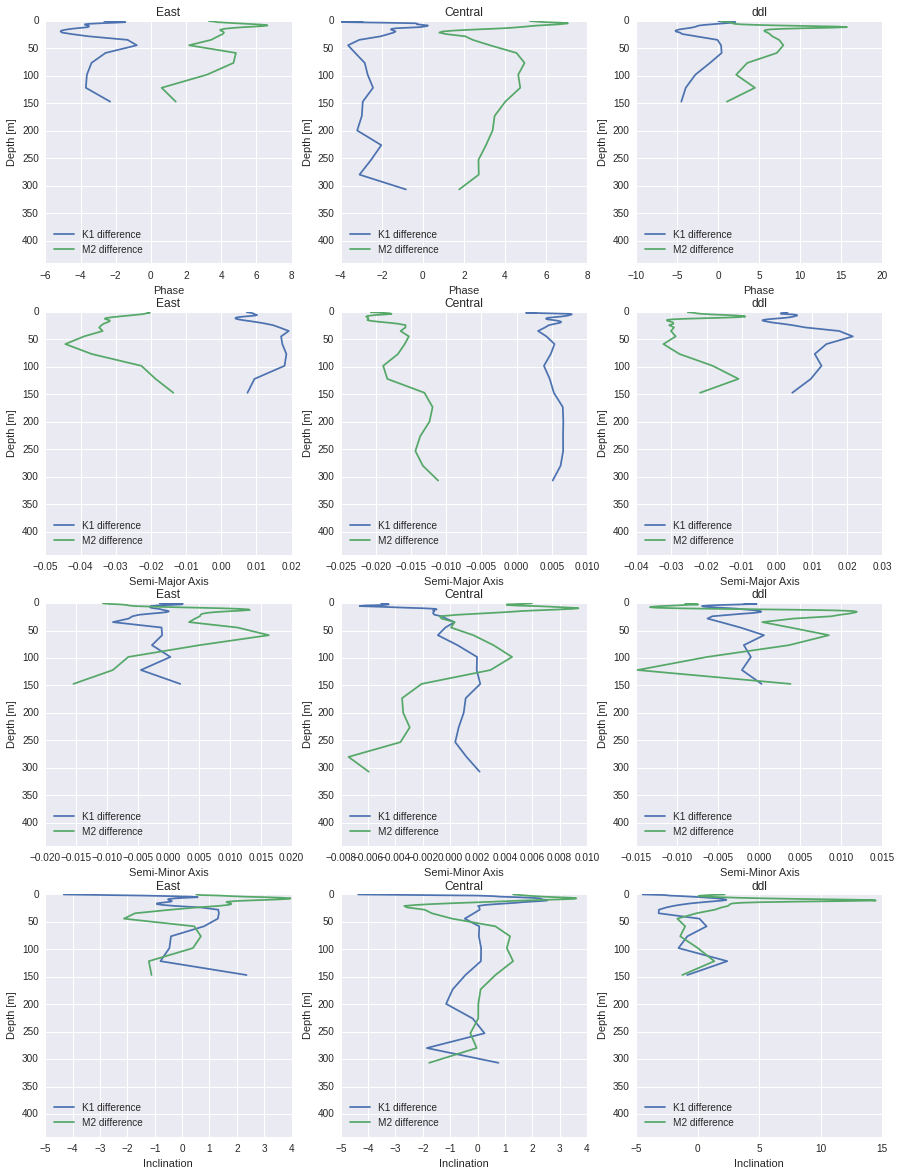

In [6]:
fig, axs = plt.subplots(4,3,figsize=(15,20))

for n, site in enumerate(SITES):
    for tide in params_15[site]:
        for m, param in enumerate(params_15[site][tide]):
            ax=axs[m,n]
            ax.plot((params_15[site][tide][param][:,0,0] - params_30[site][tide][param][:,0,0]), 
                    depths[site], label='{} difference'.format(tide))
            ax.set_title(site)
            ax.set_xlabel(param)
            ax.set_ylabel('Depth [m]')
            ax.set_ylim([max(depths[site]), 0])
            ax.legend(loc=0)

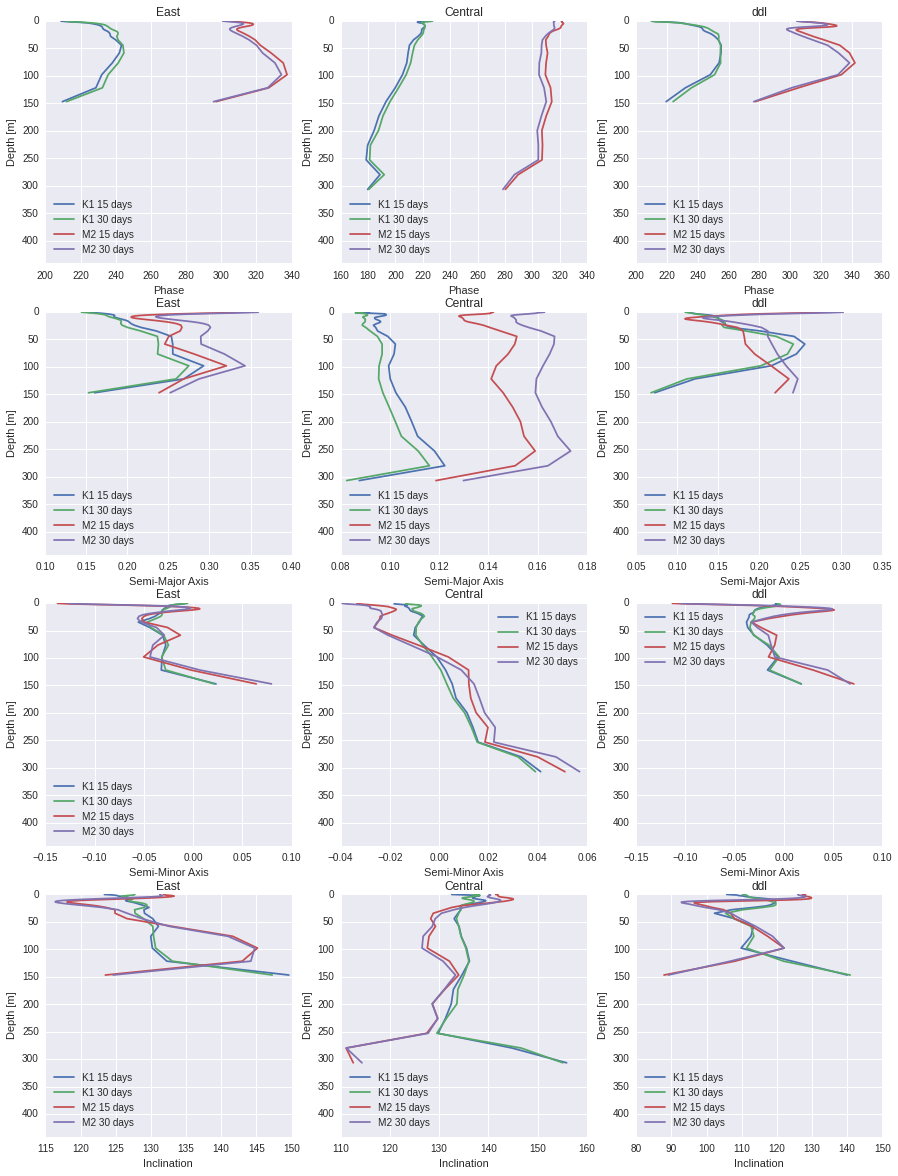

In [7]:
fig, axs = plt.subplots(4,3,figsize=(15,20))

for n, site in enumerate(SITES):
    for tide in params_15[site]:
        for m, param in enumerate(params_15[site][tide]):
            ax=axs[m,n]
            ax.plot(params_15[site][tide][param][:,0,0], 
                    depths[site], label='{} 15 days'.format(tide))
            ax.plot( params_30[site][tide][param][:,0,0], 
                depths[site], label='{} 30 days'.format(tide))
            ax.set_title(site)
            ax.set_xlabel(param)
            ax.set_ylabel('Depth [m]')
            ax.set_ylim([max(depths[site]), 0])
            ax.legend(loc=0)

* There is quite a large difference in the M2 major axis at central ( ~10%).
* Also up to 5cm/s difference in M2 major axis at east

#Question 2
Does the early freshet in April affect the tidal analysis that Muriel performed?
* Muriel's analysis is from Nov 26, 2014 to April 26, 2015

Plan: Compare Muriel's analysis with Nov 26, 2014 to March 26, 2015


### Nov 26 to April 26

In [8]:
to=datetime.datetime(2014,11,26)
tf=datetime.datetime(2015,4,26)

params_apr = {}; depths= {}

for site in SITES:
    params_apr[site], depths[site] = ellipse.get_params_nowcast(to, tf, [SITES[site]['i']], [SITES[site]['j']], path, 2)

### Nov 26 to March 26

In [9]:
to=datetime.datetime(2014,11,26)
tf=datetime.datetime(2015,3,26)

params_mar = {}; depths= {}

for site in SITES:
    params_mar[site], depths[site] = ellipse.get_params_nowcast(to, tf, [SITES[site]['i']], [SITES[site]['j']], path, 2)

##Compare

In [10]:
d=0
print 'Surface Ellipse values'
for site in SITES:
    print site
    for tide, papr in params_apr[site].items():
        print tide
        keys= papr.keys()
        print keys
        pmar=params_mar[site][tide]
        print 'Nov-Apr', papr[keys[0]][d,0,0], papr[keys[1]][d,0,0], papr[keys[2]][d,0,0], papr[keys[3]][d,0,0]
        print 'Nov-Mar', pmar[keys[0]][d,0,0], pmar[keys[1]][d,0,0], pmar[keys[2]][d,0,0], pmar[keys[3]][d,0,0]
            

Surface Ellipse values
East
K1
['Phase', 'Semi-Major Axis', 'Semi-Minor Axis', 'Inclination']
Nov-Apr 203.600521612 0.101725022191 0.00671189928086 119.349998511
Nov-Mar 208.940628723 0.1203528731 -0.00316975063711 120.860721812
M2
['Phase', 'Semi-Major Axis', 'Semi-Minor Axis', 'Inclination']
Nov-Apr 299.158233067 0.374883962964 -0.150999779483 128.501966132
Nov-Mar 300.186216892 0.370627929484 -0.140324233643 128.790879997
Central
K1
['Phase', 'Semi-Major Axis', 'Semi-Minor Axis', 'Inclination']
Nov-Apr 203.258622514 0.0619659056373 0.00346172186644 130.099364063
Nov-Mar 208.282478055 0.0758208120527 -0.00408643476418 130.53827117
M2
['Phase', 'Semi-Major Axis', 'Semi-Minor Axis', 'Inclination']
Nov-Apr 317.458852142 0.178968594419 -0.0568367086336 139.201934066
Nov-Mar 316.903967991 0.172985239208 -0.0489626292395 140.363604837
ddl
K1
['Phase', 'Semi-Major Axis', 'Semi-Minor Axis', 'Inclination']
Nov-Apr 201.110123064 0.0813240962365 0.000886582644655 100.278727966
Nov-Mar 209.44090